In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import time  

# Function to evaluate model performance
# Adjusted evaluate_model function
def evaluate_model(model, X_train, Y_train, X_test, Y_test, algorithm_name, cv_folds=5):
    start_time = time.time()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    elapsed_time = time.time() - start_time
    accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)
    print(f"\n{algorithm_name} Results")
    print(f"Accuracy: {accuracy}%")
    print(f"Training and Prediction Time: {elapsed_time:.2f} seconds")
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, Y_pred))
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))
    return accuracy  # Return accuracy

# Read and preprocess your dataset
file_path = 'cardio_train.csv'
dataset = pd.read_csv(file_path, delimiter=';')

# Check for missing values and handle them if needed
# dataset.isnull().sum()

# Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(dataset.drop('cardio', axis=1))

# Train-test split
predictors = pd.DataFrame(features_scaled, columns=dataset.columns[:-1])
target = dataset["cardio"]
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=42)

# Initialize lists for storing scores and algorithms
scores = []
algorithms = []


# Data Understanding

In [2]:
df=pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Data Manipulation

In [8]:
df.drop('id',axis=1,inplace=True)

df['age']=(df['age']/365).astype(int)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


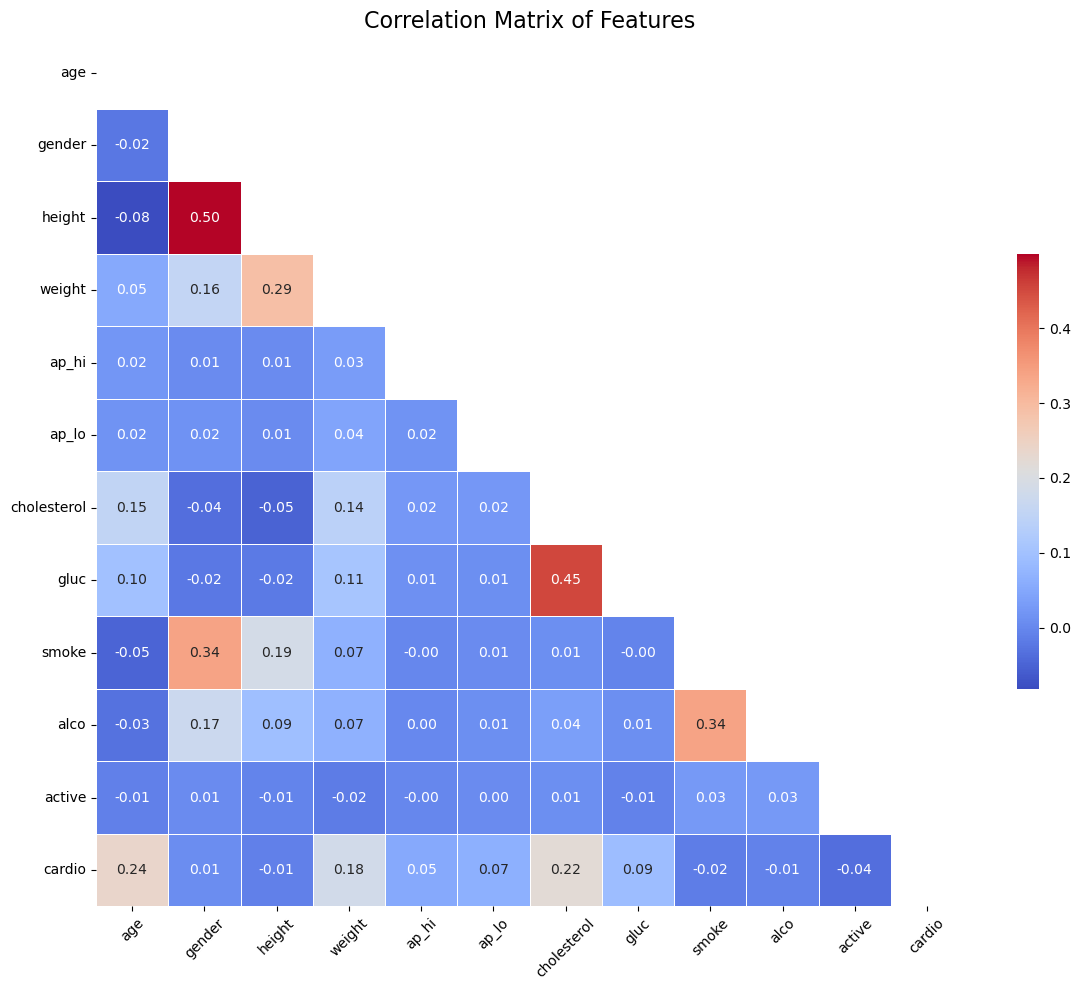

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
correlation = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [10]:
#the risk of cardio by age
mean_cardio_by_age=df.groupby('age')['cardio'].mean()

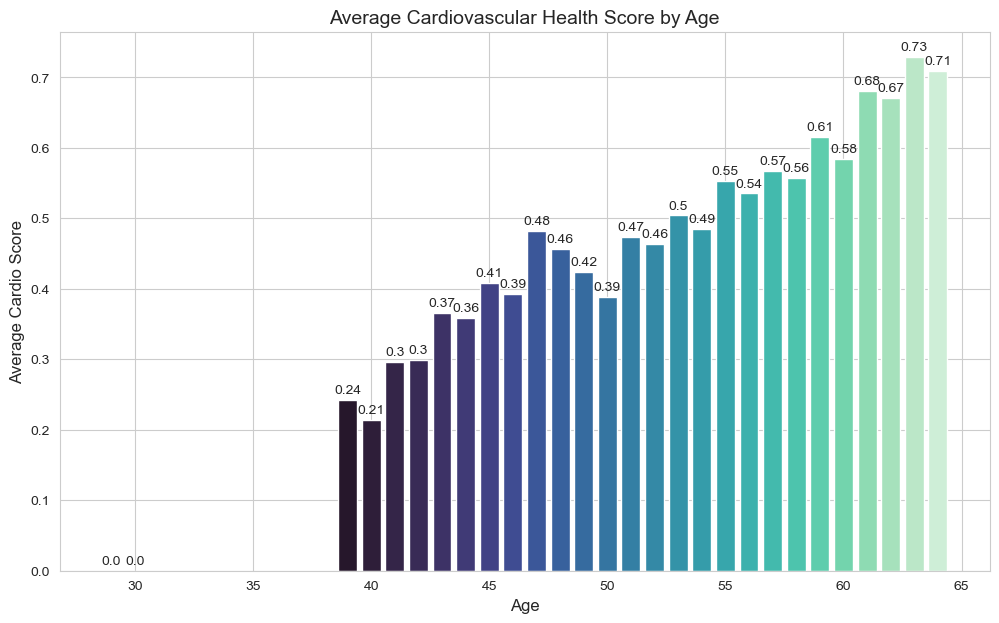

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 7))
bars = plt.bar(mean_cardio_by_age.index, mean_cardio_by_age.values, color=sns.color_palette("mako", len(mean_cardio_by_age)))

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Cardio Score', fontsize=12)
plt.title('Average Cardiovascular Health Score by Age', fontsize=14)

# Show the plot
plt.show()


In [12]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
1    45530
2    24470
Name: count, dtype: int64

In [13]:
df['gender'].replace({1: 'Female', 2: 'Male'}, inplace=True)
df['cardio'].replace({0:'No Cardio', 1:'With Cardio'}, inplace=True)

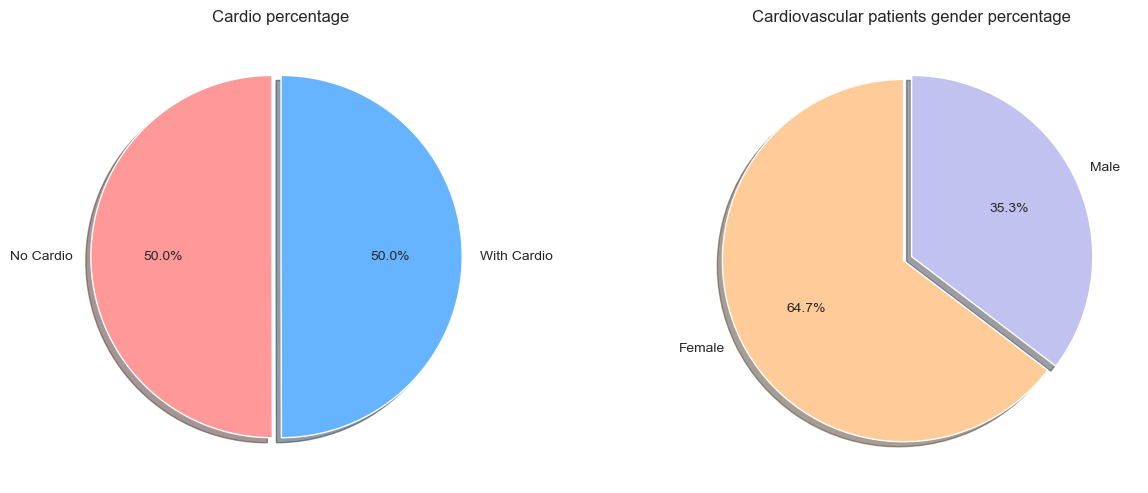

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14, 20))
plt.tight_layout(pad=10)

# Custom color palettes
cardio_colors = ['#ff9999', '#66b3ff']
gender_colors = ['#ffcc99', '#c2c2f0']

# Pie chart for Cardio percentage
cardio_counts = df['cardio'].value_counts()
ax[0].pie(x=cardio_counts, labels=cardio_counts.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=cardio_colors, explode=(0.05, 0.0))
ax[0].set_title('Cardio percentage')

# Pie chart for Cardiovascular patients gender percentage
gender_counts = df[df['cardio'] == 'With Cardio']['gender'].value_counts()
ax[1].pie(x=gender_counts, labels=gender_counts.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=gender_colors, explode=(0.05, 0.0))
ax[1].set_title('Cardiovascular patients gender percentage')

plt.show()

In [15]:
df['cholesterol']=df['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal' })

In [16]:
cholesterol_counts2 = df['cholesterol'].value_counts()
cholesterol_counts2

cholesterol
normal               52385
above normal          9549
well above normal     8066
Name: count, dtype: int64

C:\Users\test\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\test\AppData\Local\Temp\ipykernel_18092\2926507876.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

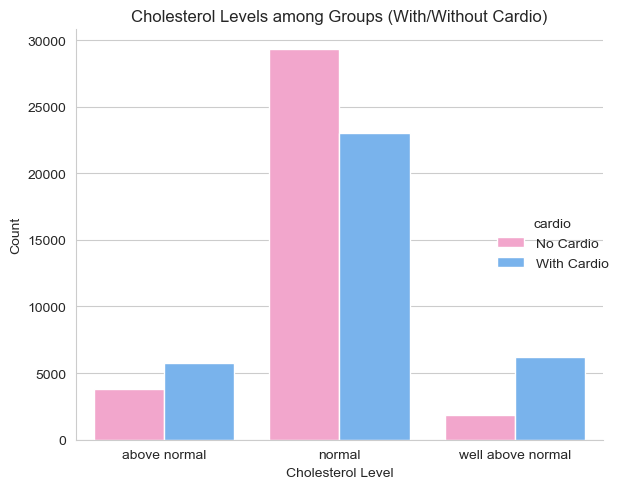

In [17]:
# Grouping data by 'cholesterol' and 'cardio' and getting counts
grouped_data = df.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')

# Plotting using Seaborn
colors = ['#ff99cc', '#66b3ff']
plt.figure(figsize=(10, 6))
sns.catplot(x='cholesterol', y='count', hue='cardio',kind='bar',palette=colors, data=grouped_data)
plt.title('Cholesterol Levels among Groups (With/Without Cardio)')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


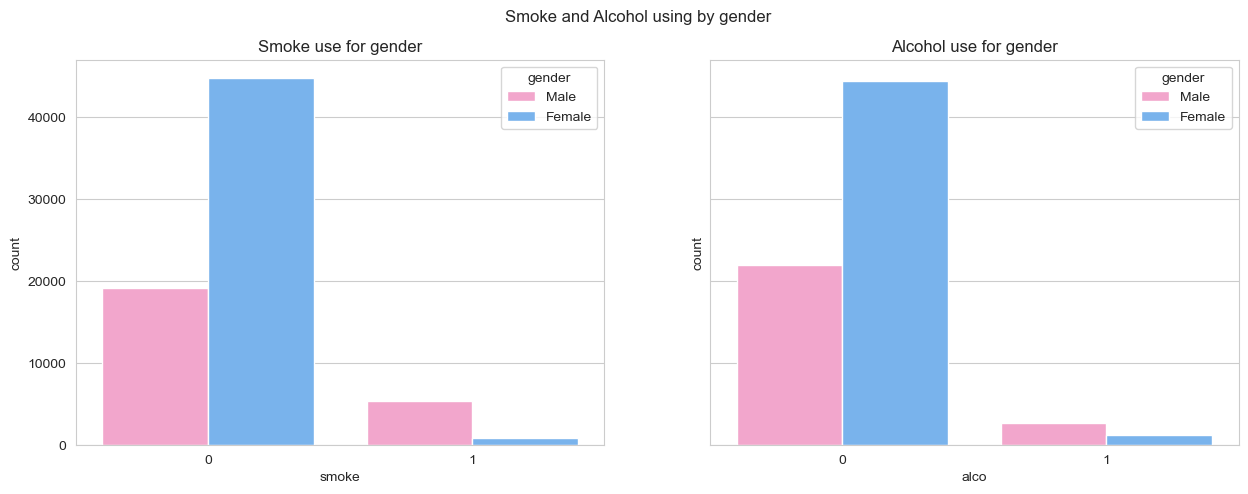

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Smoke and Alcohol using by gender')

sns.countplot(ax=axes[0], x=df.smoke,hue=df.gender,palette=colors)
axes[0].set_title("Smoke use for gender")


sns.countplot(ax=axes[1], x=df.alco,hue=df.gender,palette=colors)
axes[1].set_title("Alcohol use for gender")
plt.show()

In [19]:
df['gluc']=df['gluc'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal' })

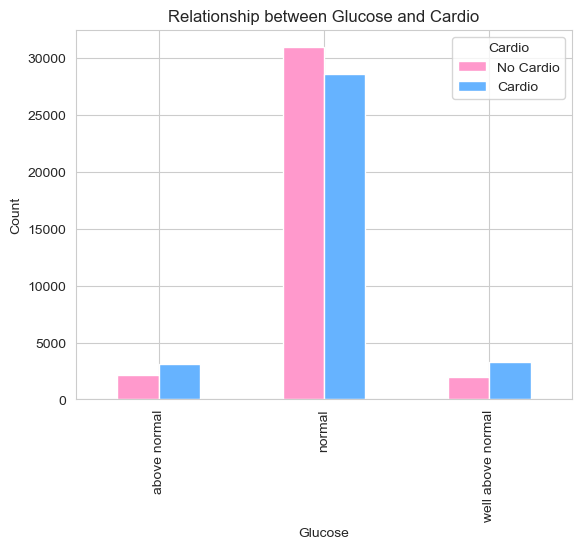

In [20]:
cross_tab = pd.crosstab(df['gluc'], df['cardio'])
cross_tab.plot(kind='bar', color=colors) 

plt.title('Relationship between Glucose and Cardio')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend(title='Cardio', labels=['No Cardio', 'Cardio'])

plt.show()

In [21]:
# Filter data by gender
male_data = df[df['gender'] == 'Male']
female_data = df[df['gender'] == 'Female']

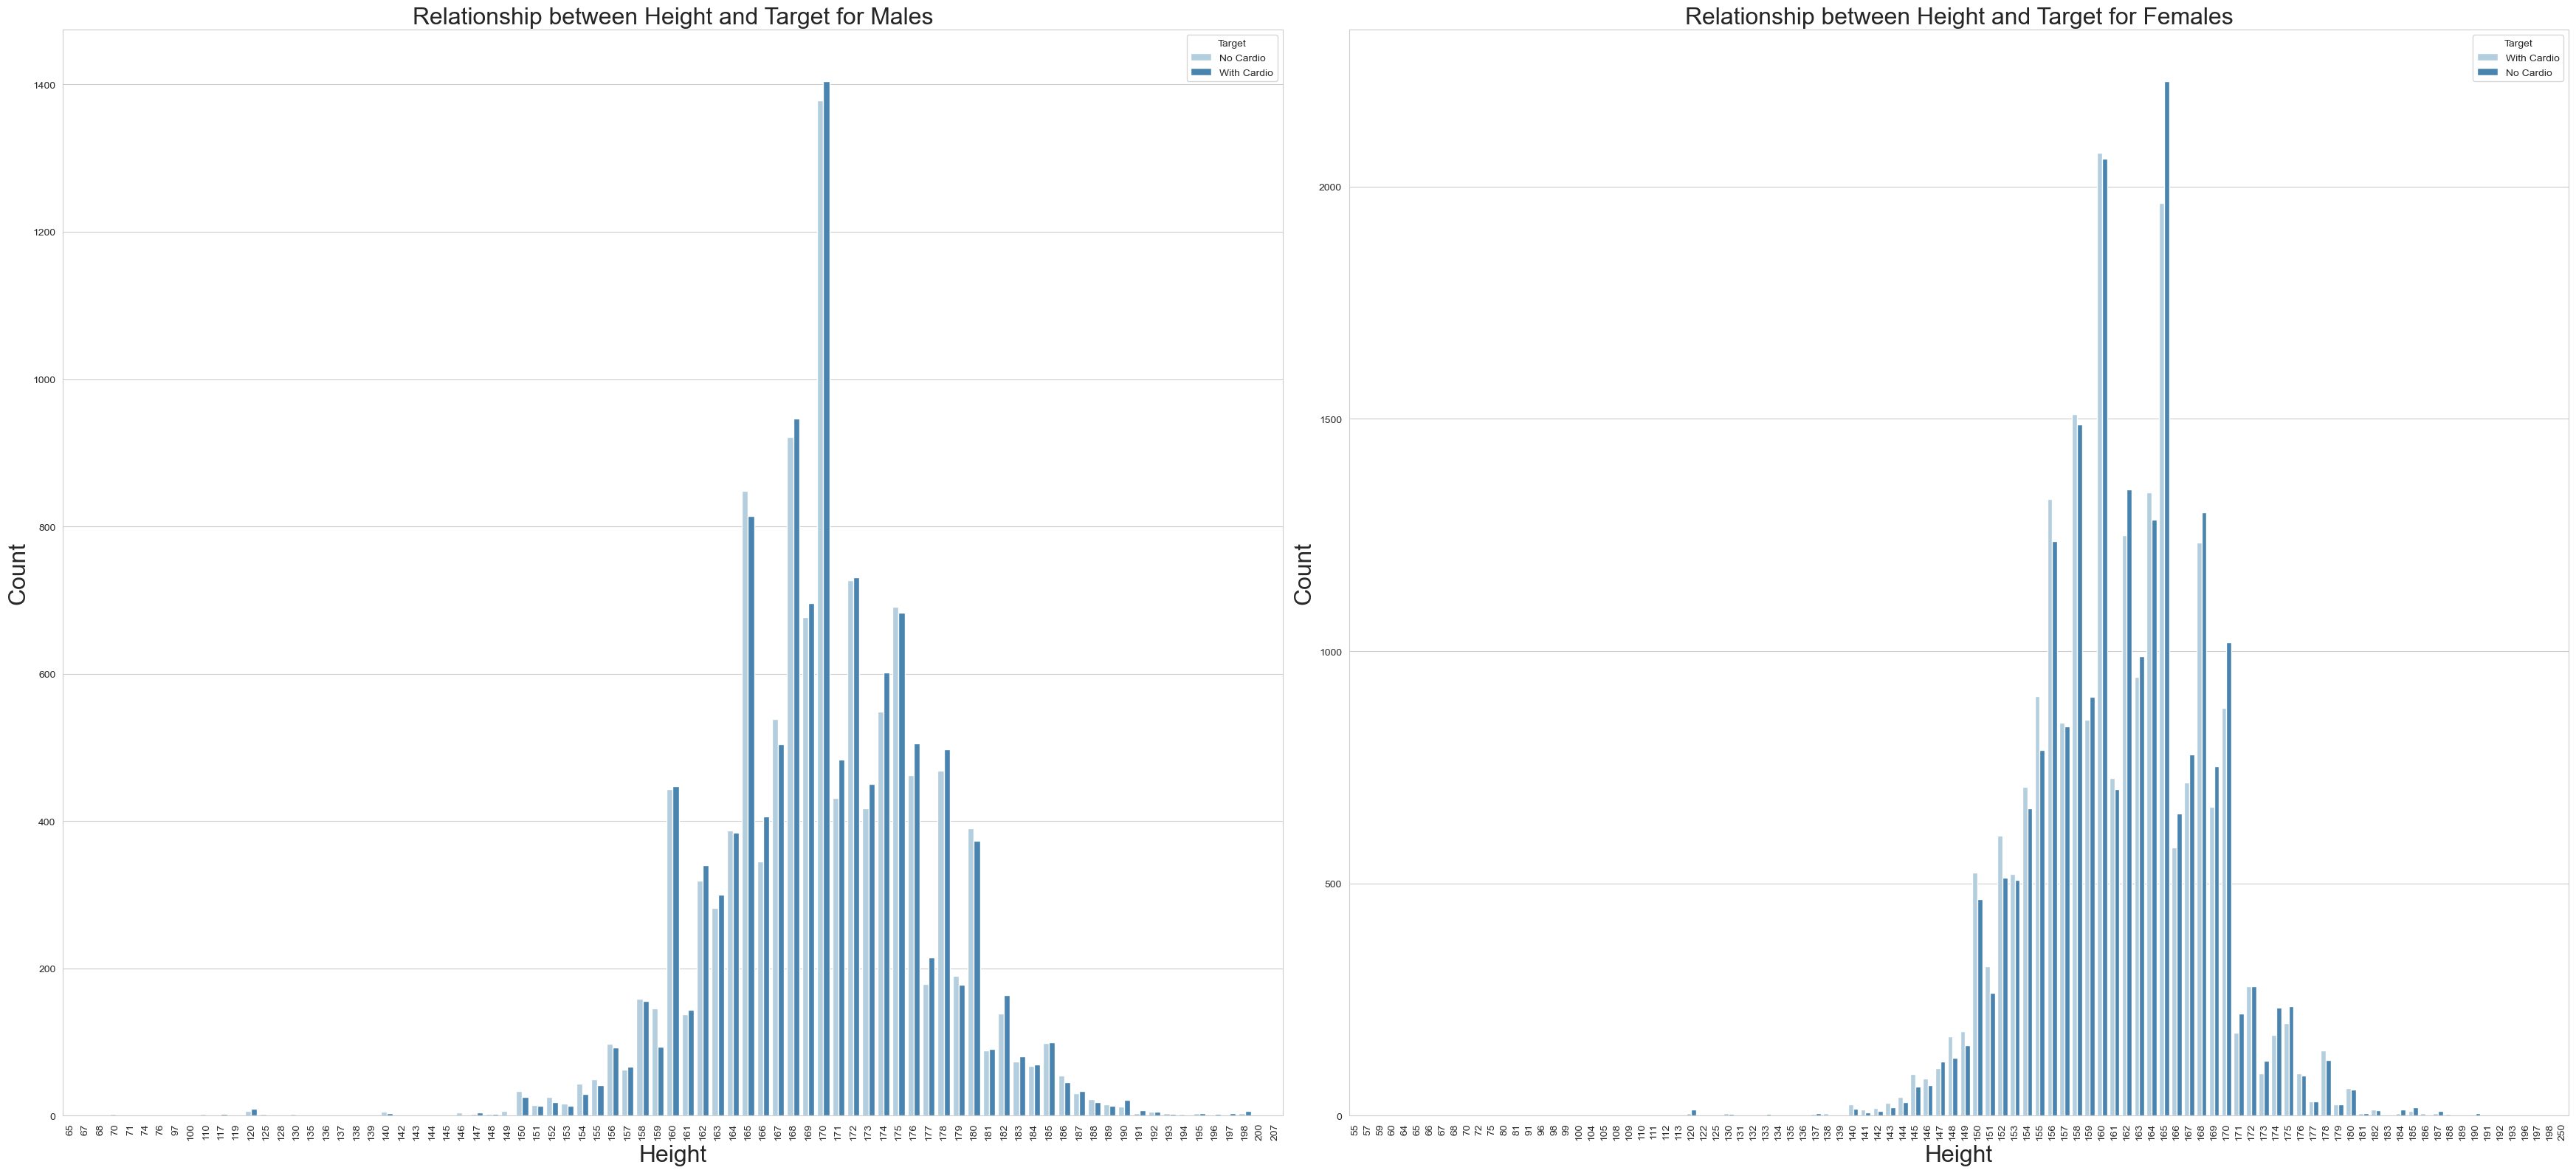

In [22]:
# Set up subplots to display plots side by side
fig, axes = plt.subplots(1, 2, figsize=(35, 16))

# Countplot for males
sns.countplot(x='height', hue='cardio', data=male_data, palette='Blues', ax=axes[0])
axes[0].set_title('Relationship between Height and Target for Males', fontsize=23)
axes[0].set_xlabel('Height', fontsize=23)
axes[0].set_ylabel('Count', fontsize=23)
axes[0].legend(title='Target')
axes[0].tick_params(axis='x', labelrotation=90)

# Countplot for females
sns.countplot(x='height', hue='cardio', data=female_data, palette='Blues', ax=axes[1])
axes[1].set_title('Relationship between Height and Target for Females', fontsize=23)
axes[1].set_xlabel('Height', fontsize=23)
axes[1].set_ylabel('Count', fontsize=23)
axes[1].legend(title='Target', loc='upper right')
axes[1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

In [23]:
pd.crosstab(df.active,df.cardio)

cardio,No Cardio,With Cardio
active,,
0,6378,7361
1,28643,27618


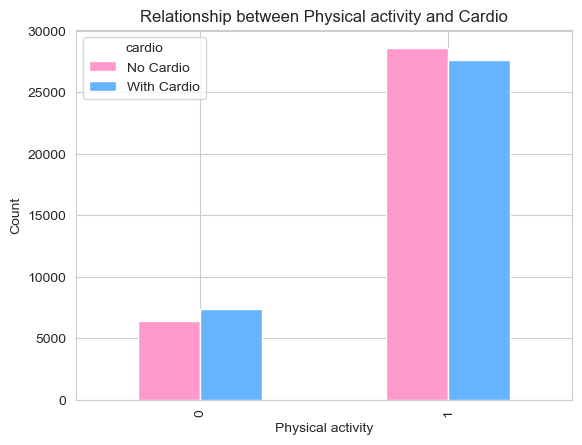

In [24]:
cross_tab = pd.crosstab(df['active'], df['cardio'])
cross_tab.plot(kind='bar', color=colors) 

plt.title('Relationship between Physical activity and Cardio')
plt.xlabel('Physical activity')
plt.ylabel('Count')

plt.show()

# TRAINING MODELS 

## Logistic Regression model

In [25]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for Logistic Regression tuning
lr_params = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Create a RandomizedSearchCV instance for Logistic Regression
lr_random = RandomizedSearchCV(lr, lr_params, n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=1)

# Fit the model on scaled data and evaluate
scores.append(evaluate_model(lr_random, X_train_scaled, Y_train, X_test_scaled, Y_test, "Logistic Regression Tuned"))
algorithms.append("Logistic Regression Tuned")



Fitting 5 folds for each of 10 candidates, totalling 50 fits

Logistic Regression Tuned Results
Accuracy: 72.38%
Training and Prediction Time: 5.66 seconds
Confusion Matrix:
[[5365 1623]
 [2244 4768]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



## Naive Bayes model

In [26]:

# Create a Naive Bayes model with Laplace smoothing
nb = GaussianNB(var_smoothing=1e-3)

# Using StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5)

# Evaluate the Naive Bayes model with cross-validation
cross_val_scores = cross_val_score(nb, X_train_scaled, Y_train, cv=skf, scoring='accuracy')
average_accuracy = np.mean(cross_val_scores)

# Append the average accuracy to scores
nb_accuracy = evaluate_model(nb, X_train_scaled, Y_train, X_test_scaled, Y_test, "Naive Bayes Tuned")
scores.append(nb_accuracy)
algorithms.append("Naive Bayes Tuned")


Naive Bayes Tuned Results
Accuracy: 59.34%
Training and Prediction Time: 0.02 seconds
Confusion Matrix:
[[6082  906]
 [4787 2225]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.87      0.68      6988
           1       0.71      0.32      0.44      7012

    accuracy                           0.59     14000
   macro avg       0.64      0.59      0.56     14000
weighted avg       0.64      0.59      0.56     14000



## XGBoost model

In [27]:
# XGBoost with hyperparameter tuning
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_random = RandomizedSearchCV(xgb_model, xgb_params, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=2)

scores.append(evaluate_model(xgb_random, X_train, Y_train, X_test, Y_test, "XGBoost Tuned"))
algorithms.append("XGBoost Tuned")


Fitting 3 folds for each of 10 candidates, totalling 30 fits

XGBoost Tuned Results
Accuracy: 73.83%
Training and Prediction Time: 2.87 seconds
Confusion Matrix:
[[5422 1566]
 [2098 4914]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



## SVM model

In [28]:

# Adjusted hyperparameter space
svm_params = {
    'C': np.logspace(-2, 2, 3),  # Reduced to 3 values
    'gamma': np.logspace(-3, 2, 4),  # Reduced to 4 values
    'kernel': ['rbf', 'sigmoid']  # Using 2 kernel types
}

sv = svm.SVC()
sv_random = RandomizedSearchCV(sv, svm_params, n_iter=5, cv=2, random_state=42, n_jobs=-1, verbose=2)

# Assuming evaluate_model is a defined function and X_train_scaled, Y_train, X_test_scaled, Y_test, scores, algorithms are predefined
scores.append(evaluate_model(sv_random, X_train_scaled, Y_train, X_test_scaled, Y_test, "SVM Tuned"))
algorithms.append("SVM Tuned")


Fitting 2 folds for each of 5 candidates, totalling 10 fits

SVM Tuned Results
Accuracy: 73.26%
Training and Prediction Time: 380.01 seconds
Confusion Matrix:
[[5645 1343]
 [2400 4612]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6988
           1       0.77      0.66      0.71      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



## K-Nearest Neighbors model

In [29]:
# K-Nearest Neighbors with tuning
knn_params = {'n_neighbors': range(1, 11)}
knn = KNeighborsClassifier()
knn_random = RandomizedSearchCV(knn, knn_params, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=2)
scores.append(evaluate_model(knn_random, X_train_scaled, Y_train, X_test_scaled, Y_test, "KNN Tuned"))
algorithms.append("KNN Tuned")



Fitting 3 folds for each of 10 candidates, totalling 30 fits

KNN Tuned Results
Accuracy: 63.76%
Training and Prediction Time: 74.85 seconds
Confusion Matrix:
[[4559 2429]
 [2644 4368]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6988
           1       0.64      0.62      0.63      7012

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



## Decision Tree model

In [30]:
# Decision Tree with basic hyperparameter tuning
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeClassifier(random_state=42)
dt_random = RandomizedSearchCV(dt, dt_params, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=2)
scores.append(evaluate_model(dt_random, X_train, Y_train, X_test, Y_test, "Decision Tree Tuned"))
algorithms.append("Decision Tree Tuned")



Fitting 3 folds for each of 10 candidates, totalling 30 fits

Decision Tree Tuned Results
Accuracy: 72.93%
Training and Prediction Time: 2.57 seconds
Confusion Matrix:
[[5251 1737]
 [2053 4959]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      6988
           1       0.74      0.71      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



## Random Forest

In [31]:
# Random Forest with extended hyperparameter tuning
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=20, cv=3, random_state=42, n_jobs=-1, verbose=2)
scores.append(evaluate_model(rf_random, X_train, Y_train, X_test, Y_test, "Random Forest Tuned"))
algorithms.append("Random Forest Tuned")


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Random Forest Tuned Results
Accuracy: 73.85%
Training and Prediction Time: 157.03 seconds
Confusion Matrix:
[[5495 1493]
 [2168 4844]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6988
           1       0.76      0.69      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



## Ensemble learning methods (BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier)

In [32]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
bagging_params = {
    'n_estimators': [10, 20, 30],
    'base_estimator__max_depth': [5, 10, None]
}
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
bagging_random = RandomizedSearchCV(bagging_model, bagging_params, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=2)
scores.append(evaluate_model(bagging_random, X_train, Y_train, X_test, Y_test, "Bagging with Decision Trees Tuned"))
algorithms.append("Bagging with Decision Trees Tuned")


# AdaBoost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid for AdaBoost hyperparameter tuning
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'base_estimator__max_depth': [1, 2, 3, 4, 5]  # You can choose the appropriate depth range
}

# Create the AdaBoost model with DecisionTreeClassifier as the base estimator
ada_boost_tuned = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Create a RandomizedSearchCV instance for AdaBoost
ada_random = RandomizedSearchCV(ada_boost_tuned, ada_params, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=2)

# Evaluate and append the tuned AdaBoost model to your list
scores.append(evaluate_model(ada_random, X_train, Y_train, X_test, Y_test, "AdaBoost Tuned"))
algorithms.append("AdaBoost Tuned")

# Gradient Boosting with basic hyperparameter tuning
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gradient_boost = GradientBoostingClassifier(random_state=42)
gb_random = RandomizedSearchCV(gradient_boost, gb_params, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=2)
scores.append(evaluate_model(gb_random, X_train, Y_train, X_test, Y_test, "Gradient Boosting Tuned"))
algorithms.append("Gradient Boosting Tuned")

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\test\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging with Decision Trees Tuned Results
Accuracy: 73.57%
Training and Prediction Time: 30.89 seconds
Confusion Matrix:
[[5436 1552]
 [2148 4864]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.69      0.72      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\test\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



AdaBoost Tuned Results
Accuracy: 73.91%
Training and Prediction Time: 63.97 seconds
Confusion Matrix:
[[5417 1571]
 [2081 4931]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Gradient Boosting Tuned Results
Accuracy: 73.74%
Training and Prediction Time: 147.67 seconds
Confusion Matrix:
[[5366 1622]
 [2055 4957]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74 

## ENSEMBLE MODEL

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming your individual models are named lr, nb, sv, knn, dt, rf, xgb_model, bagging_model, ada_boost, gradient_boost, model (NN)

# Define a list of tuples with your base models
base_models = [
    ('lr', lr),
    ('svm', sv),
    ('rf', rf),
    ('xgb', xgb_model),
    ('bagging', bagging_model),
    ('ada', ada_boost_tuned),
    ('gradient_boost', gradient_boost)
   
]

# Define the final meta-learner model
final_estimator = LogisticRegression()

# Create the stacking ensemble
stack_model = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)

# Fit the model on the entire training data
stack_model.fit(X_train, Y_train)

# Evaluate the model
stack_pred = stack_model.predict(X_test)
stack_accuracy = accuracy_score(Y_test, stack_pred)

print(f"\nStacking Ensemble Model Results")
print(f"Accuracy: {stack_accuracy}%")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, stack_pred))
print("Classification Report:")
print(classification_report(Y_test, stack_pred))


C:\Users\test\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-package


Stacking Ensemble Model Results
Accuracy: 0.7392142857142857%
Confusion Matrix:
[[5366 1622]
 [2029 4983]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



## NN model 

In [34]:
# Neural Network
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=12))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set verbose=1 to see the animated progress bar
history = model.fit(X_train, Y_train, epochs=40, validation_data=(X_test, Y_test), callbacks=[early_stopping], verbose=1)

Y_pred_nn = (model.predict(X_test) > 0.5).astype(int).reshape(-1)
score_nn = round(accuracy_score(Y_pred_nn, Y_test) * 100, 2)
print(f"\nNeural Network Results\nAccuracy: {score_nn}%")
scores.append(score_nn)
algorithms.append("Neural Network")




Epoch 1/300


1750/1750 [==============================] - 4s 2ms/step - loss: 0.6288 - accuracy: 0.6530 - val_loss: 0.6016 - val_accuracy: 0.6835
Epoch 2/300
1750/1750 [==============================] - 3s 1ms/step - loss: 0.5966 - accuracy: 0.6926 - val_loss: 0.5780 - val_accuracy: 0.7133
Epoch 3/300
1750/1750 [==============================] - 3s 1ms/step - loss: 0.5764 - accuracy: 0.7189 - val_loss: 0.5686 - val_accuracy: 0.7298
Epoch 4/300
1750/1750 [==============================] - 3s 1ms/step - loss: 0.5697 - accuracy: 0.7248 - val_loss: 0.5661 - val_accuracy: 0.7304
Epoch 5/300
1750/1750 [==============================] - 3s 2ms/step - loss: 0.5669 - accuracy: 0.7272 - val_loss: 0.5674 - val_accuracy: 0.7291
Epoch 6/300
1750/1750 [==============================] - 2s 1ms/step - loss: 0.5651 - accuracy: 0.7269 - val_loss: 0.5655 - val_accuracy: 0.7309
Epoch 7/300
1750/1750 [==============================] - 3s 1ms/step - loss: 0.5637 - accuracy: 0.7279 - val_loss: 0.5650 - va

# MODEL COMPARSION

C:\Users\test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


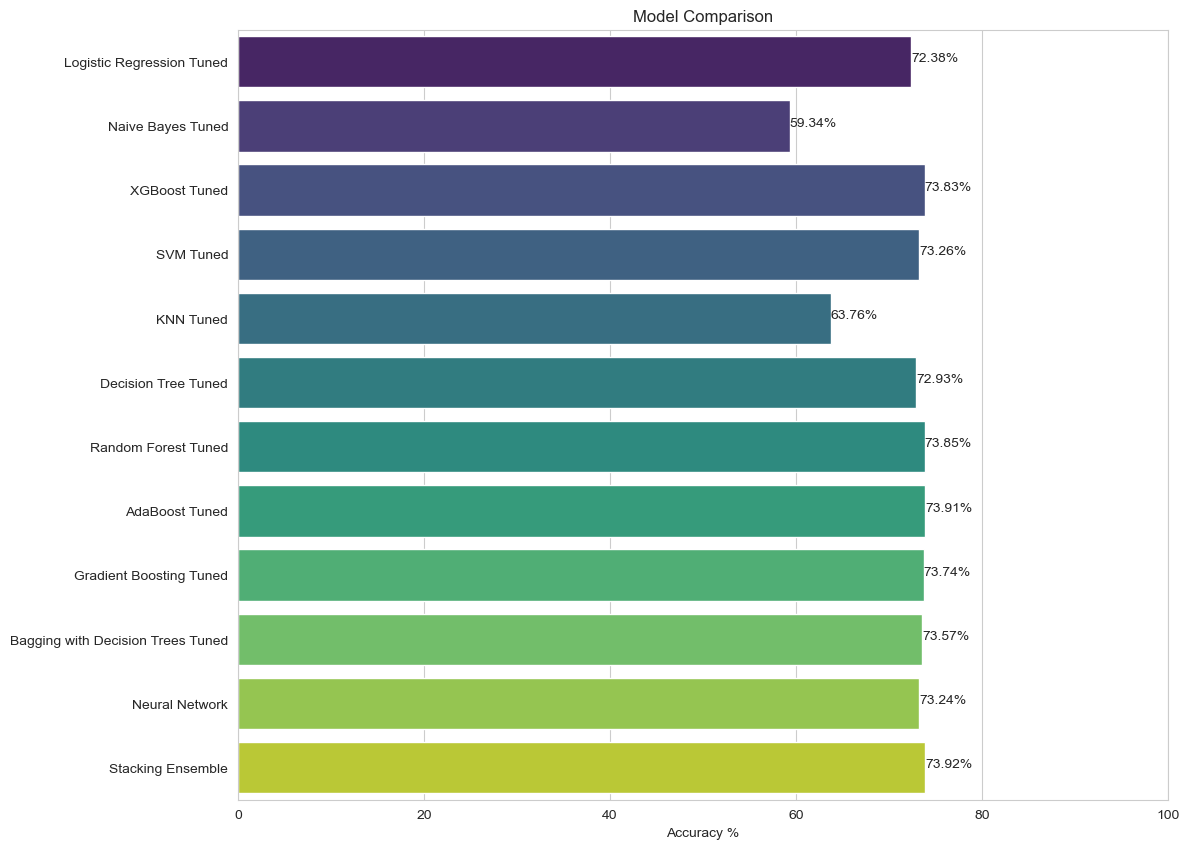

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Updated scores based on your model results
scores = [
    72.38,  # Logistic Regression Tuned
    59.34,  # Naive Bayes Tuned
    73.83,  # XGBoost Tuned
    73.26,  # SVM Tuned
    63.76,  # KNN Tuned
    72.93,  # Decision Tree Tuned
    73.85,  # Random Forest Tuned
    73.91,  # AdaBoost Tuned
    73.74,  # Gradient Boosting Tuned
    73.57,  # Bagging with Decision Trees Tuned
    73.24,  # Neural Network
    73.92   # Stacking Ensemble
]

# Corresponding algorithms
algorithms = [
    "Logistic Regression Tuned",
    "Naive Bayes Tuned",
    "XGBoost Tuned",
    "SVM Tuned",
    "KNN Tuned",
    "Decision Tree Tuned",
    "Random Forest Tuned",
    "AdaBoost Tuned",
    "Gradient Boosting Tuned",
    "Bagging with Decision Trees Tuned",
    "Neural Network",
    "Stacking Ensemble"
]

# Plotting Model Comparisons
plt.figure(figsize=(12, 10))
sns.barplot(x=scores, y=algorithms, palette="viridis")

# Adding annotations to each bar for displaying the accuracy in percentage
for index, value in enumerate(scores):
    plt.text(value, index, f'{value:.2f}%')

plt.xlabel('Accuracy %')
plt.title('Model Comparison')
plt.xlim(0, 100)  # Accuracy scores are in percentage
plt.show()
